<a href="https://colab.research.google.com/github/Aper777/Aper/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.Data Loading and Initial Exploration: Load the train.csv file into a pandas DataFrame. Use .head() and .info() to get a quick overview of the data, including the number of rows, columns, and data types.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!ls /content

import pandas as pd

train_df = pd.read_csv('/content/train.csv')
train_df.head()
# train_df.info()


sample_data  train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2Univariate Data Analysis: Choose one numerical feature (e.g., GrLivArea, LotArea) and one categorical feature (e.g., Neighborhood, HouseStyle). For the numerical feature, calculate and interpret the mean, median, standard deviation, and IQR using pandas. For the categorical feature, create a frequency table using .value_counts().

In [ ]:
# Digital feature

mean_val = train_df['GrLivArea'].mean()
median_val = train_df['GrLivArea'].median()
sd_val = train_df['GrLivArea'].std()

print("sd_val", sd_val, "mean_val", mean_val, "median_val", median_val)
# IQR = Q3 - Q1
Q1 = train_df['GrLivArea'].quantile(0.25)
Q3 = train_df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
print("IQR", IQR)
freq_table = train_df['Neighborhood'].value_counts()
freq_table

sd_val 525.4803834232027 mean_val 1515.463698630137 median_val 1464.0
IQR 647.25


,count
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73


3.Visualizing Numerical Distributions: For the SalePrice variable, create a histogram and a box plot using seaborn. Analyze the plots to describe the distribution of sale prices. Is it symmetric, skewed, or multimodal? Are there any obvious outliers?

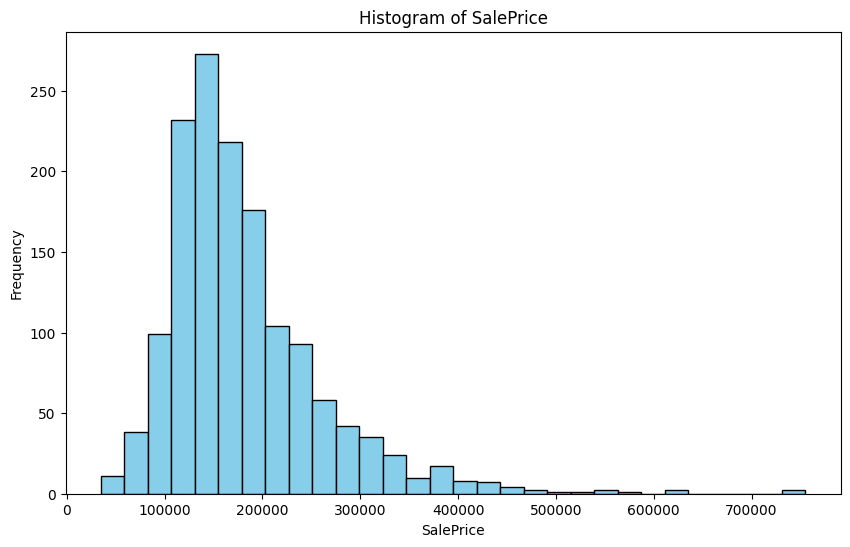

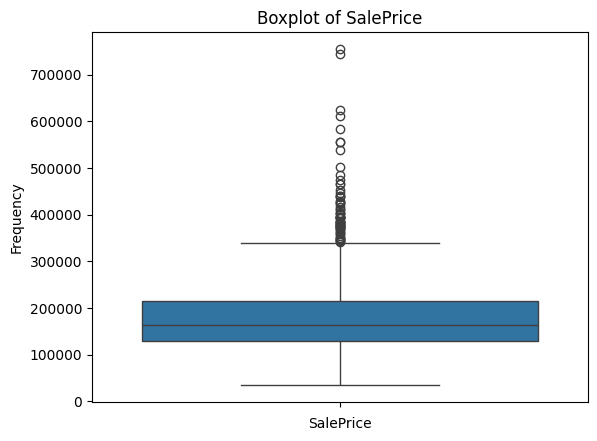

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(train_df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(train_df['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

4.Handling Skewed Data: The problem description mentions that the evaluation metric is the RMSE of the log of the sales price. This suggests SalePrice is likely skewed. Create a new column with the log-transformed SalePrice and visualize its distribution with a histogram. Compare it to the original SalePrice histogram.

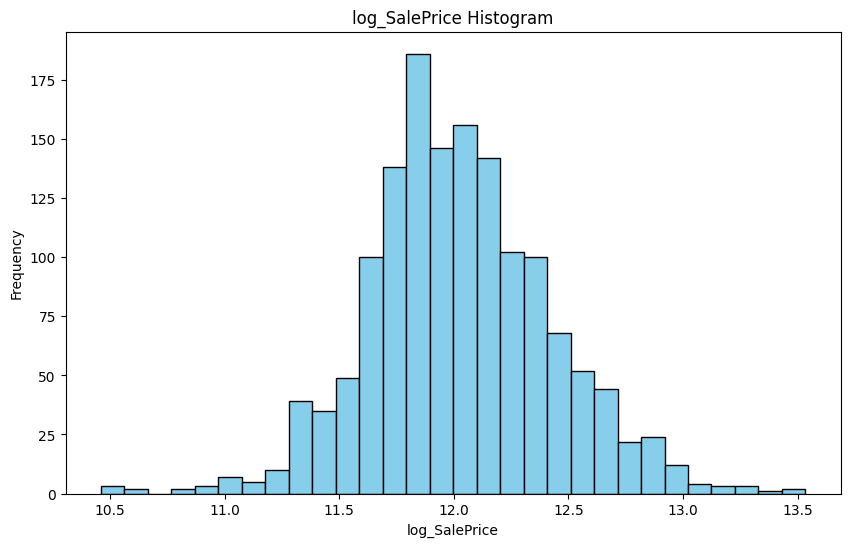

In [ ]:

train_df['log_SalePrice'] = np.log1p(train_df['SalePrice'])
plt.figure(figsize=(10, 6))
plt.hist(train_df['log_SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('log_SalePrice Histogram')
plt.xlabel('log_SalePrice')
plt.ylabel('Frequency')
plt.show()

5.Bivariate Analysis (Numerical vs. Numerical): Select two numerical features (e.g., GrLivArea and SalePrice). Create a scatter plot using seaborn.scatterplot() to visualize their relationship. Calculate the Pearson's correlation coefficient using pandas and interpret its value.

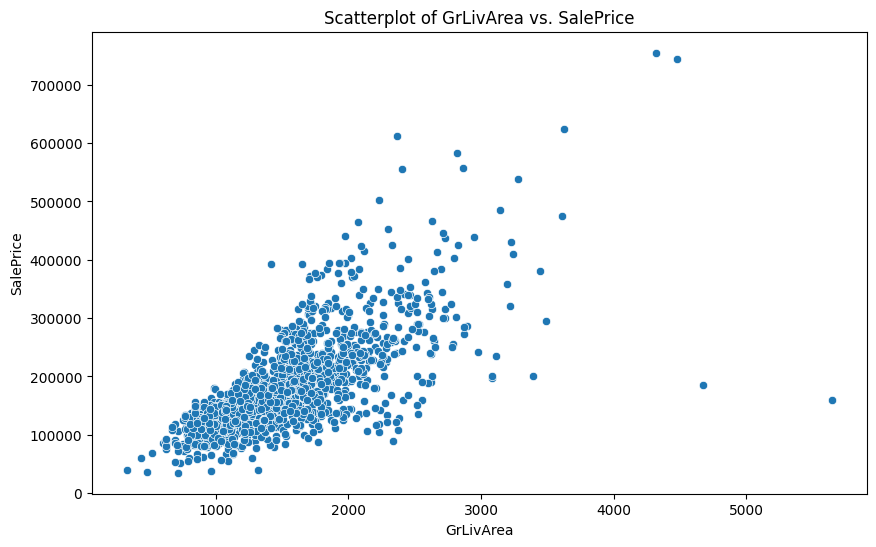

core 0.7086244776126523


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='GrLivArea', y = 'SalePrice')
plt.title('Scatterplot of GrLivArea vs. SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()
core = train_df['GrLivArea'].corr(train_df['SalePrice'])
print("core", core)

6.Bivariate Analysis (Numerical vs. Categorical): Use a box plot from seaborn to visualize the relationship between a categorical feature (e.g., OverallQual) and the numerical target variable SalePrice. Do houses with higher OverallQual ratings tend to have higher sale prices?

Text(0, 0.5, 'SalePrice')

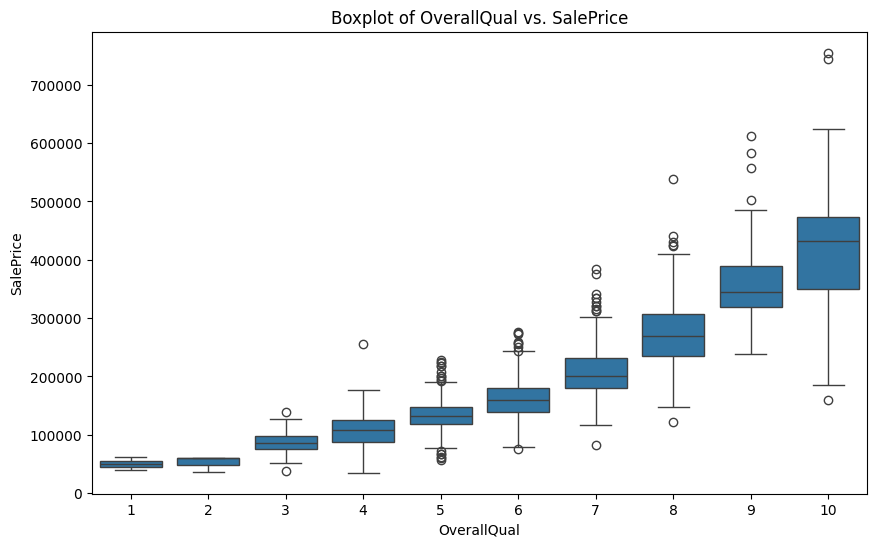

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='OverallQual', y='SalePrice')
plt.title('Boxplot of OverallQual vs. SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')



7.Exploring Missing Data: Identify columns with missing values in the dataset. Use pandas to calculate the percentage of missing values for each column. Discuss strategies for handling missing data based on the percentage (e.g., dropping columns, imputing values).

In [41]:
missing_data = train_df.isnull().sum()
print("missing_data", missing_data)
missing_percentage = (missing_data / len(train_df)) * 100
print("missing_percentage \n", missing_percentage)
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].median())
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].median())

missing_data Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
log_SalePrice    0
Length: 82, dtype: int64
missing_percentage 
 Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
log_SalePrice    0.0
Length: 82, dtype: float64


8.Feature Engineering: The competition description mentions creative feature engineering. Create a new feature by combining existing features (e.g., TotalSF by adding TotalBsmtSF, 1stFlrSF, and 2ndFlrSF). Calculate the correlation between this new feature and SalePrice.

In [44]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
core = train_df['TotalSF'].corr(train_df['SalePrice'])
print("core", core)
# train_df['TotalBsmtSF']

core 0.7822600527979846


9.Correlation Heatmap: Generate a correlation heatmap using seaborn.heatmap() to visualize the correlation matrix of several key numerical features, including SalePrice. This helps identify which features are most strongly correlated with the target variable and with each other.

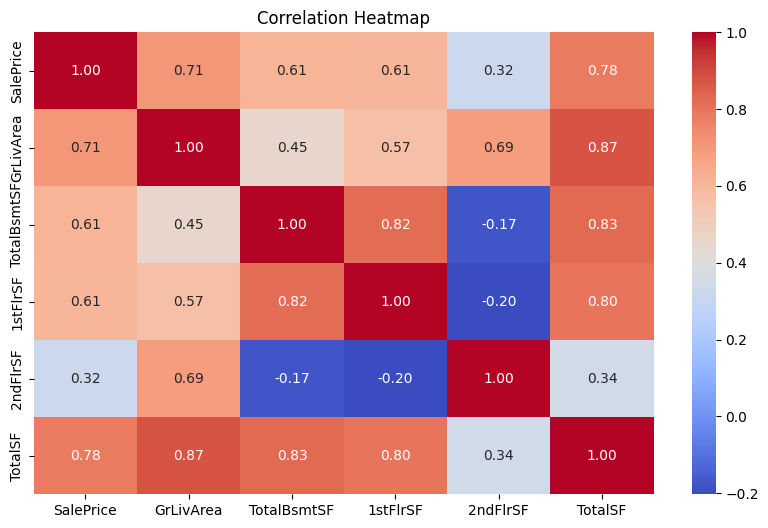

In [48]:
num_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF']
correl_matrix = train_df[num_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


10.Data Visualization of Outliers: The BoxPlot section in the slides defines outliers. Using the SalePrice variable, programmatically identify the outliers based on the IQR method. Create a scatter plot of GrLivArea vs. SalePrice and highlight the identified outliers in a different color.

Number of outliers: 61


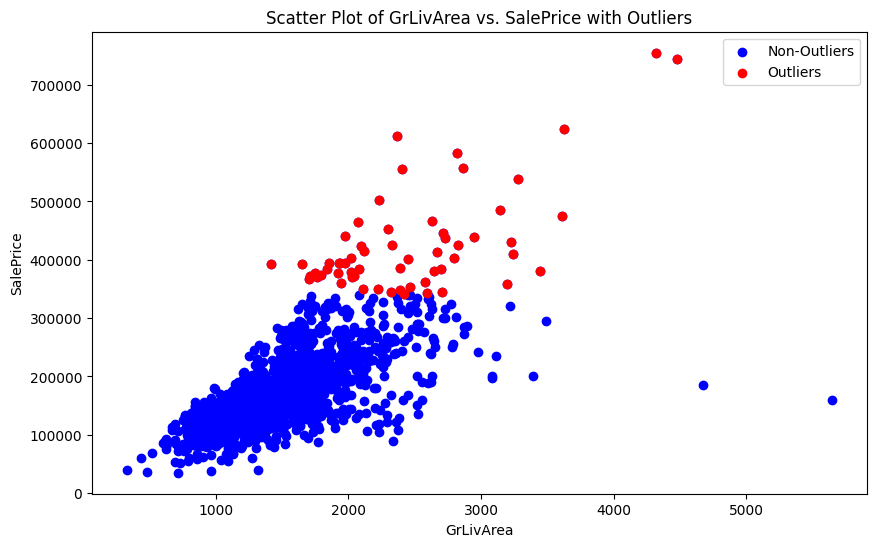

In [55]:
q1_sal = train_df['SalePrice'].quantile(0.25)
q3_sal = train_df['SalePrice'].quantile(0.75)
iqr_sal = q3_sal - q1_sal
lower_bound = q1_sal - 1.5 * iqr_sal
upper_bound = q3_sal + 1.5 * iqr_sal
outliers = train_df[(train_df['SalePrice'] < lower_bound) | (train_df['SalePrice'] > upper_bound)]
print("Number of outliers:", len(outliers))
plt.figure(figsize=(10, 6))
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], color='blue', label='Non-Outliers')
plt.scatter(outliers['GrLivArea'], outliers['SalePrice'], color='red', label='Outliers')
plt.title('Scatter Plot of GrLivArea vs. SalePrice with Outliers')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()